In [1]:
import numpy as np
import xarray as xr
import sys
import glob
import netCDF4 as nc
import os
import sys
import h5py
import scipy.io
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import numpy.matlib
from matplotlib.ticker import MaxNLocator
import copy
import pandas as pd
from scipy.io import savemat
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

from functions_ecco_NEW import dayofyear_climo_extended_NEW

from os.path import join,expanduser,exists,split
user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))
#import ecco_v4_py as ecco

# Suppress warning messages for a cleaner presentation
import warnings
warnings.filterwarnings('ignore')

# Inputs

In [2]:
create_var_dict_HARDDRIVE_NEEDED = True

In [17]:
# Region tag for title in plots
title_tag = 'NEP' # NEP SWP TASMAN

# Define years
years = np.arange(1992,2018) # 1992-2017

if title_tag == 'SWP':
    # Define box
    lon_min = 189.5 #- 360
    lon_max = lon_min + 30
    lat_min = -45.5
    lat_max = lat_min + 20
    start_time_plot = '2009-01-01'
    end_time_plot = '2013-12-31'
    
elif title_tag == 'TASMAN': # (147°E, 155°E) and (45°S, 37°S)
    # Define box
    lon_min = 147 #- 360
    lon_max = lon_min + 8
    lat_min = -45
    lat_max = lat_min + 8
    start_time_plot = '2015-01-01'
    end_time_plot = '2016-12-31'

elif title_tag == 'NEP':
    # Define box
    lon_min = 209.5 #- 360
    lon_max = lon_min + 16
    lat_min = 39.5
    lat_max = lat_min + 11  
    start_time_plot = '2012-01-01'
    end_time_plot = '2016-12-31'


In [18]:
# Calculate area

# Load one OISST file
file_path = f'/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1992_rcon.nc'
sst = xr.open_dataset(file_path)

# Earth's radius in meters
R = 6371e3

# Calculate the area of each grid cell
lat_rad = np.deg2rad(sst["lat"])
lon_rad = np.deg2rad(sst["lon"])

# Calculate the width and height of each cell in meters
dlat = np.deg2rad(1)  # Difference in latitude in radians (1 degree)
dlon = np.deg2rad(1)  # Difference in longitude in radians (1 degree)

# Calculate the area for each latitude
cell_area_lat = R**2 * dlat * dlon * np.cos(lat_rad)

# Expand the cell_area_lat to match the grid dimensions
cell_area = np.outer(cell_area_lat, np.ones(sst["lon"].size))

# Create the final DataArray with the same dimensions as SST
cell_area_expanded = xr.DataArray(
    cell_area,
    dims=["lat", "lon"],
    coords={
        "lat": sst["lat"],
        "lon": sst["lon"]
    },
    name="area"
)

# Convert to DataSet
area = cell_area_expanded.to_dataset(name = 'area')

# Print the resulting cell_area
# area

In [19]:
var_data = []
for year in years:
    print(year)
    
    # Load OISST data
    file_path = f'/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.{year}_rcon.nc'
    dataset = xr.open_dataset(file_path)
    print('done: load')
    
    # Cut the region of interest
    lat_bounds = np.logical_and(dataset.lat > lat_min, dataset.lat < lat_max)
    lon_bounds = np.logical_and(dataset.lon > lon_min, dataset.lon < lon_max)
    lat_lon_bounds = np.logical_and(lat_bounds, lon_bounds) # if box passes the dateline, we need to add on this line "or np.logical_and(lat_bounds2, lon_bounds2)" 


    # Filter over box
    dataset_box = dataset['sst'].where(lat_lon_bounds, np.nan)
    area_box = area['area'].where(lat_lon_bounds, np.nan)
    print('done: box')
    
    # Weighted average
    avg_box = (dataset_box * area_box).sum(["lat", "lon"]) / area_box.sum(["lat", "lon"])

    avg_box.name = 'SST'
    print('done: avg box')
    var_data.append(avg_box)
    print('done: append')

# Concatenate the datasets along the time dimension
var_dataset = xr.concat(var_data, dim='time')
#var_dataset.name = ivar_load

# Save the dataset as a NetCDF file
output_path = f'/Users/jacoposala/Desktop/CU/3.RESEARCH/NASA_project/NEW_heatBudgetECCO/code/line_plots/OISST_1993_2017_avg_box_{title_tag}.nc'
var_dataset.to_netcdf(output_path)



1992
done: load
done: box
done: avg box
done: append
1993
done: load
done: box
done: avg box
done: append
1994
done: load
done: box
done: avg box
done: append
1995
done: load
done: box
done: avg box
done: append
1996
done: load
done: box
done: avg box
done: append
1997
done: load
done: box
done: avg box
done: append
1998
done: load
done: box
done: avg box
done: append
1999
done: load
done: box
done: avg box
done: append
2000
done: load
done: box
done: avg box
done: append
2001
done: load
done: box
done: avg box
done: append
2002
done: load
done: box
done: avg box
done: append
2003
done: load
done: box
done: avg box
done: append
2004
done: load
done: box
done: avg box
done: append
2005
done: load
done: box
done: avg box
done: append
2006
done: load
done: box
done: avg box
done: append
2007
done: load
done: box
done: avg box
done: append
2008
done: load
done: box
done: avg box
done: append
2009
done: load
done: box
done: avg box
done: append
2010
done: load
done: box
done: avg box
done: 

In [1]:
import h5py

In [2]:
file_path = '/Users/jacoposala/Downloads/ECCO_daily_region_test_DG/figures/ECCOv4r4_heat_daily_box_1992_2018_prcnt90_noTrend_minLen_5tsteps_withAVE.mat'



In [3]:
mat_data = h5py.File(file_path, 'r')

# List the keys in the file
# print("Keys in the file:", list(mat_data.keys()))

# Access the data under the key '#refs#'
refs_data = mat_data['#refs#']

# Access the data under the key 'find_MHWs_info'
find_mhws_info_data = mat_data['find_MHWs_info']


In [5]:
find_mhws_info_data.keys()

<KeysViewHDF5 ['G_advection_declineAve', 'G_advection_eventAve', 'G_advection_onsetAve', 'G_diffusion_declineAve', 'G_diffusion_eventAve', 'G_diffusion_onsetAve', 'G_forcing_declineAve', 'G_forcing_eventAve', 'G_forcing_onsetAve', 'G_total_declineAve', 'G_total_eventAve', 'G_total_onsetAve', 'data_mhw_tstep_msk', 'data_percentile3d', 'data_seasonal', 'data_used4MHWs', 'data_used4MHWs_declineAve', 'data_used4MHWs_eventAve', 'data_used4MHWs_onsetAve', 'delta_tstep', 'end_tstep', 'end_tstep_stored_at_peak', 'events_duration_in_tsteps', 'events_number', 'flag_remove_trend', 'onset_duration_in_tsteps', 'peak_tstep', 'peak_tstep_msk', 'peak_value', 'percentile', 'start_tstep', 'start_tstep_msk', 'years']>

In [45]:
# start_date = date(int(find_mhws_info_data['years'].value[0][0]),1,1)
# end_date = date(int(find_mhws_info_data['years'].value[-1][0]),12,31)

start_date = date(1992,1,2)
end_date = date(2017,12,31)

In [58]:
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d').to_pydatetime()


In [72]:
MHW_prnctl_mask = find_mhws_info_data['data_used4MHWs'][:,:,0][:,0]>find_mhws_info_data['data_percentile3d'][:,:,0][:,0]



<BarContainer object of 975 artists>

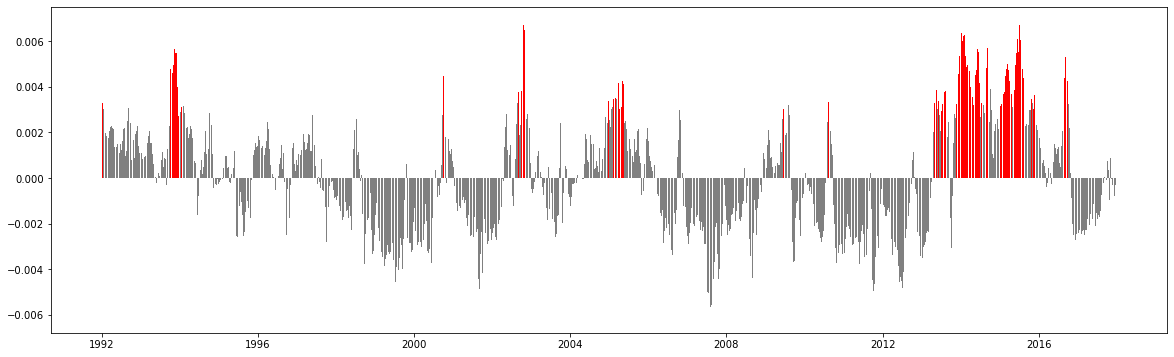

In [75]:
plt.figure(figsize=(20,6))
plt.bar(dates, find_mhws_info_data['data_used4MHWs'][:,:,0][:,0], color='grey')
plt.bar(dates[MHW_prnctl_mask], find_mhws_info_data['data_used4MHWs'][:,:,0][:,0][MHW_prnctl_mask], color='red')
